In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # Fixed 'mping' to 'mpimg'

from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D  # Fixed incorrect line split

from sklearn.utils import shuffle  # Fixed incorrect split
from sklearn.model_selection import train_test_split  # Fixed incorrect split

import imgaug.augmenters as iaa  # Fixed incorrect split

import cv2
import pandas as pd
import ntpath
import random

In [6]:
import pandas as pd

# Load the CSV file
csv_path = "driving_log.csv"  # Update this with the correct path if needed
df = pd.read_csv(csv_path)

# Display the first few rows
df.head()

/Users/shubhamsuhaskamble/Downloads/CarData/IMG/center_2025_04_02_18_37_25_384.jpg  \
0  /Users/shubhamsuhaskamble/Downloads/CarData/IM...                                   
1  /Users/shubhamsuhaskamble/Downloads/CarData/IM...                                   
2  /Users/shubhamsuhaskamble/Downloads/CarData/IM...                                   
3  /Users/shubhamsuhaskamble/Downloads/CarData/IM...                                   
4  /Users/shubhamsuhaskamble/Downloads/CarData/IM...                                   

   /Users/shubhamsuhaskamble/Downloads/CarData/IMG/left_2025_04_02_18_37_25_384.jpg  \
0   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                  
1   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                  
2   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                  
3   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                  
4   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                  

   /Users/shubhamsuhaskamble/Downloads/CarData/IMG/right_2025_04_02_18_37_25_384.jpg  \
0   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                   
1   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                   
2   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                   
3   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                   
4   /Users/shubhamsuhaskamble/Downloads/CarData/I...                                   

     0   0.1   0.2   8.139737E-05  
0  0.0   0.0   0.0       0.000078  
1  0.0   0.0   0.0       0.000079  
2  0.0   0.0   0.0       0.000079  
3  0.0   0.0   0.0       0.000079  
4  0.0   0.0   0.0       0.000078

In [10]:
import pandas as pd

# Load CSV file
csv_path = "driving_log.csv"  # Update if needed
df = pd.read_csv(csv_path)

# Rename columns for easier access
df.columns = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']

# Set display options to show full paths
pd.options.display.max_colwidth = None  # Show full content of columns

# Print to verify
print(df.head())  # Display first few rows

                                                                               center  \
0  /Users/shubhamsuhaskamble/Downloads/CarData/IMG/center_2025_04_02_18_37_25_486.jpg   
1  /Users/shubhamsuhaskamble/Downloads/CarData/IMG/center_2025_04_02_18_37_25_597.jpg   
2  /Users/shubhamsuhaskamble/Downloads/CarData/IMG/center_2025_04_02_18_37_25_707.jpg   
3  /Users/shubhamsuhaskamble/Downloads/CarData/IMG/center_2025_04_02_18_37_25_817.jpg   
4  /Users/shubhamsuhaskamble/Downloads/CarData/IMG/center_2025_04_02_18_37_25_924.jpg   

                                                                                left  \
0   /Users/shubhamsuhaskamble/Downloads/CarData/IMG/left_2025_04_02_18_37_25_486.jpg   
1   /Users/shubhamsuhaskamble/Downloads/CarData/IMG/left_2025_04_02_18_37_25_597.jpg   
2   /Users/shubhamsuhaskamble/Downloads/CarData/IMG/left_2025_04_02_18_37_25_707.jpg   
3   /Users/shubhamsuhaskamble/Downloads/CarData/IMG/left_2025_04_02_18_37_25_817.jpg   
4   /Users/shubhamsuhaska

In [12]:
# Define the extra path to remove
extra_path = "/Users/shubhamsuhaskamble/Downloads/CarData/IMG/"

# Remove extra path from 'center', 'left', and 'right' columns
df[['center', 'left', 'right']] = df[['center', 'left', 'right']].apply(lambda x: x.str.replace(extra_path, '', regex=False))

# Print to verify
print(df.head())

                               center                               left  \
0  center_2025_04_02_18_37_25_486.jpg   left_2025_04_02_18_37_25_486.jpg   
1  center_2025_04_02_18_37_25_597.jpg   left_2025_04_02_18_37_25_597.jpg   
2  center_2025_04_02_18_37_25_707.jpg   left_2025_04_02_18_37_25_707.jpg   
3  center_2025_04_02_18_37_25_817.jpg   left_2025_04_02_18_37_25_817.jpg   
4  center_2025_04_02_18_37_25_924.jpg   left_2025_04_02_18_37_25_924.jpg   

                                right  steering  throttle  brake     speed  
0   right_2025_04_02_18_37_25_486.jpg       0.0       0.0    0.0  0.000078  
1   right_2025_04_02_18_37_25_597.jpg       0.0       0.0    0.0  0.000079  
2   right_2025_04_02_18_37_25_707.jpg       0.0       0.0    0.0  0.000079  
3   right_2025_04_02_18_37_25_817.jpg       0.0       0.0    0.0  0.000079  
4   right_2025_04_02_18_37_25_924.jpg       0.0       0.0    0.0  0.000078  


In [13]:
df.info() #to confirm if there is no missing or incorrect values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   center    3420 non-null   object 
 1   left      3420 non-null   object 
 2   right     3420 non-null   object 
 3   steering  3420 non-null   float64
 4   throttle  3420 non-null   float64
 5   brake     3420 non-null   float64
 6   speed     3420 non-null   float64
dtypes: float64(4), object(3)
memory usage: 187.2+ KB


In [14]:
print(df.head()) #to check if the changes were applied correctly.

                               center                               left  \
0  center_2025_04_02_18_37_25_486.jpg   left_2025_04_02_18_37_25_486.jpg   
1  center_2025_04_02_18_37_25_597.jpg   left_2025_04_02_18_37_25_597.jpg   
2  center_2025_04_02_18_37_25_707.jpg   left_2025_04_02_18_37_25_707.jpg   
3  center_2025_04_02_18_37_25_817.jpg   left_2025_04_02_18_37_25_817.jpg   
4  center_2025_04_02_18_37_25_924.jpg   left_2025_04_02_18_37_25_924.jpg   

                                right  steering  throttle  brake     speed  
0   right_2025_04_02_18_37_25_486.jpg       0.0       0.0    0.0  0.000078  
1   right_2025_04_02_18_37_25_597.jpg       0.0       0.0    0.0  0.000079  
2   right_2025_04_02_18_37_25_707.jpg       0.0       0.0    0.0  0.000079  
3   right_2025_04_02_18_37_25_817.jpg       0.0       0.0    0.0  0.000079  
4   right_2025_04_02_18_37_25_924.jpg       0.0       0.0    0.0  0.000078  


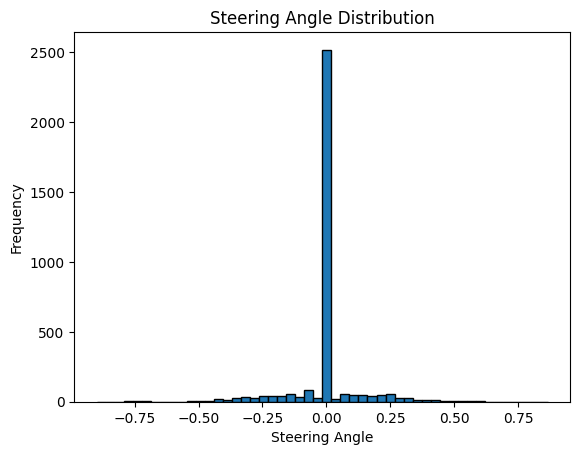

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['steering'], bins=50, edgecolor='black')
plt.xlabel('Steering Angle')
plt.ylabel('Frequency')
plt.title('Steering Angle Distribution')
plt.show()

In [16]:
print(df['steering'].value_counts().head(10))  # Show most frequent angles

steering
 0.000000    2477
-0.058557       2
-0.068397       2
-0.318306       2
 0.135390       1
 0.064824       1
 0.108249       1
 0.224055       1
 0.109443       1
 0.334914       1
Name: count, dtype: int64


In [17]:
# Separate zero and non-zero angles
df_zero = df[df['steering'] == 0]  # All zero steering samples
df_nonzero = df[df['steering'] != 0]  # All nonzero steering samples

# Keep only 20% of zero-angle samples
df_zero_sampled = df_zero.sample(frac=0.2, random_state=42)  

# Merge back with non-zero steering data
df_balanced = pd.concat([df_zero_sampled, df_nonzero], ignore_index=True)

# Print new distribution
print(df_balanced['steering'].value_counts().head(10))

steering
 0.000000    495
-0.058557      2
-0.068397      2
-0.318306      2
 0.135390      1
 0.064824      1
 0.108249      1
 0.224055      1
 0.109443      1
 0.334914      1
Name: count, dtype: int64


In [18]:
import cv2
import numpy as np

def augment_flip(image_path, steering_angle):
    """Loads an image, flips it horizontally, and inverts the steering angle."""
    image = cv2.imread(extra_path + image_path)  # Read image
    flipped_image = cv2.flip(image, 1)  # Flip horizontally
    flipped_steering = -steering_angle  # Reverse steering angle
    return flipped_image, flipped_steering

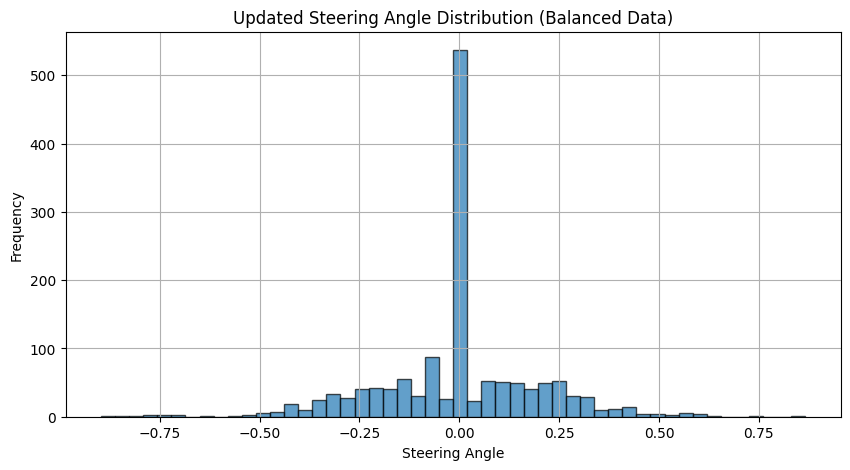

In [19]:
import matplotlib.pyplot as plt #Data Augmentation (For better model generation)

plt.figure(figsize=(10, 5))
plt.hist(df_balanced['steering'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Steering Angle')
plt.ylabel('Frequency')
plt.title('Updated Steering Angle Distribution (Balanced Data)')
plt.grid(True)
plt.show()

In [20]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Set image dimensions
IMG_HEIGHT, IMG_WIDTH = 66, 200  # NVIDIA model recommended size

def preprocess_image(image_path):
    """Load an image, resize it, and normalize pixel values."""
    img = cv2.imread(extra_path + image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize
    img = img / 255.0  # Normalize (0-1)
    return img

In [22]:
import os #Load and preprocess images
import cv2
import numpy as np

# Define constants
IMG_WIDTH, IMG_HEIGHT = 200, 66  # Resize dimensions
extra_path = "/Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/IMG/"

def preprocess_image(image_path):
    """Load an image, check if it exists, resize it, and normalize pixel values."""
    full_path = os.path.join(extra_path, image_path)  # Construct full path
    
    if not os.path.exists(full_path):
        raise FileNotFoundError(f"❌ Image not found: {full_path}")

    img = cv2.imread(full_path)
    
    if img is None:
        raise ValueError(f"⚠️ Could not read image: {full_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize
    img = img / 255.0  # Normalize (0-1)

    return img

In [23]:
# Load images and steering angles
X = np.array([preprocess_image(img_path) for img_path in df_balanced['center']])
y = df_balanced['steering'].values  # Steering angles

# Split dataset (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_valid)}")

Training samples: 1150, Validation samples: 288


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

def create_cnn_model():
    model = Sequential([
        Input(shape=(66, 200, 3)),  # Set input shape explicitly
        Conv2D(24, (5, 5), strides=(2, 2), activation='relu'),
        Conv2D(36, (5, 5), strides=(2, 2), activation='relu'),
        Conv2D(48, (5, 5), strides=(2, 2), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.3),
        Dense(50, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1)  # Steering angle output
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return model

In [29]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Create the CNN model
model = create_cnn_model()

# Define callbacks
checkpoint = ModelCheckpoint(
    "self_driving_model.keras",  # Saves in recommended Keras format
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stops if val_loss doesn’t improve for 3 epochs
    restore_best_weights=True,  # Loads best weights
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint, early_stopping]
)

# Explicitly save the final model
model.save("self_driving_model.keras")  

Epoch 1/10
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0422
Epoch 1: val_loss improved from inf to 0.03056, saving model to self_driving_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0421 - val_loss: 0.0306
Epoch 2/10
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0409
Epoch 2: val_loss improved from 0.03056 to 0.02477, saving model to self_driving_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0407 - val_loss: 0.0248
Epoch 3/10
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0305
Epoch 3: val_loss improved from 0.02477 to 0.01892, saving model to self_driving_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0306 - val_loss: 0.0189
Epoch 4/10
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0279
Epoch 4: val_loss improved from 0.01892 to 0.01675, saving model to self_driving_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0278 - val_loss: 0.0167
Epoch 5/10
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0244
Epoch 

In [31]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your full dataset inputs and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0128
Test Loss: 0.0139


In [33]:
model.save("self_driving_model.keras")

In [70]:
def preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)  # Convert to YUV
    image = image[70:-25, :, :]  # Crop top 70 and bottom 25 pixels
    image = cv2.resize(image, (200, 66))  # Resize to NVIDIA's preferred input
    return image

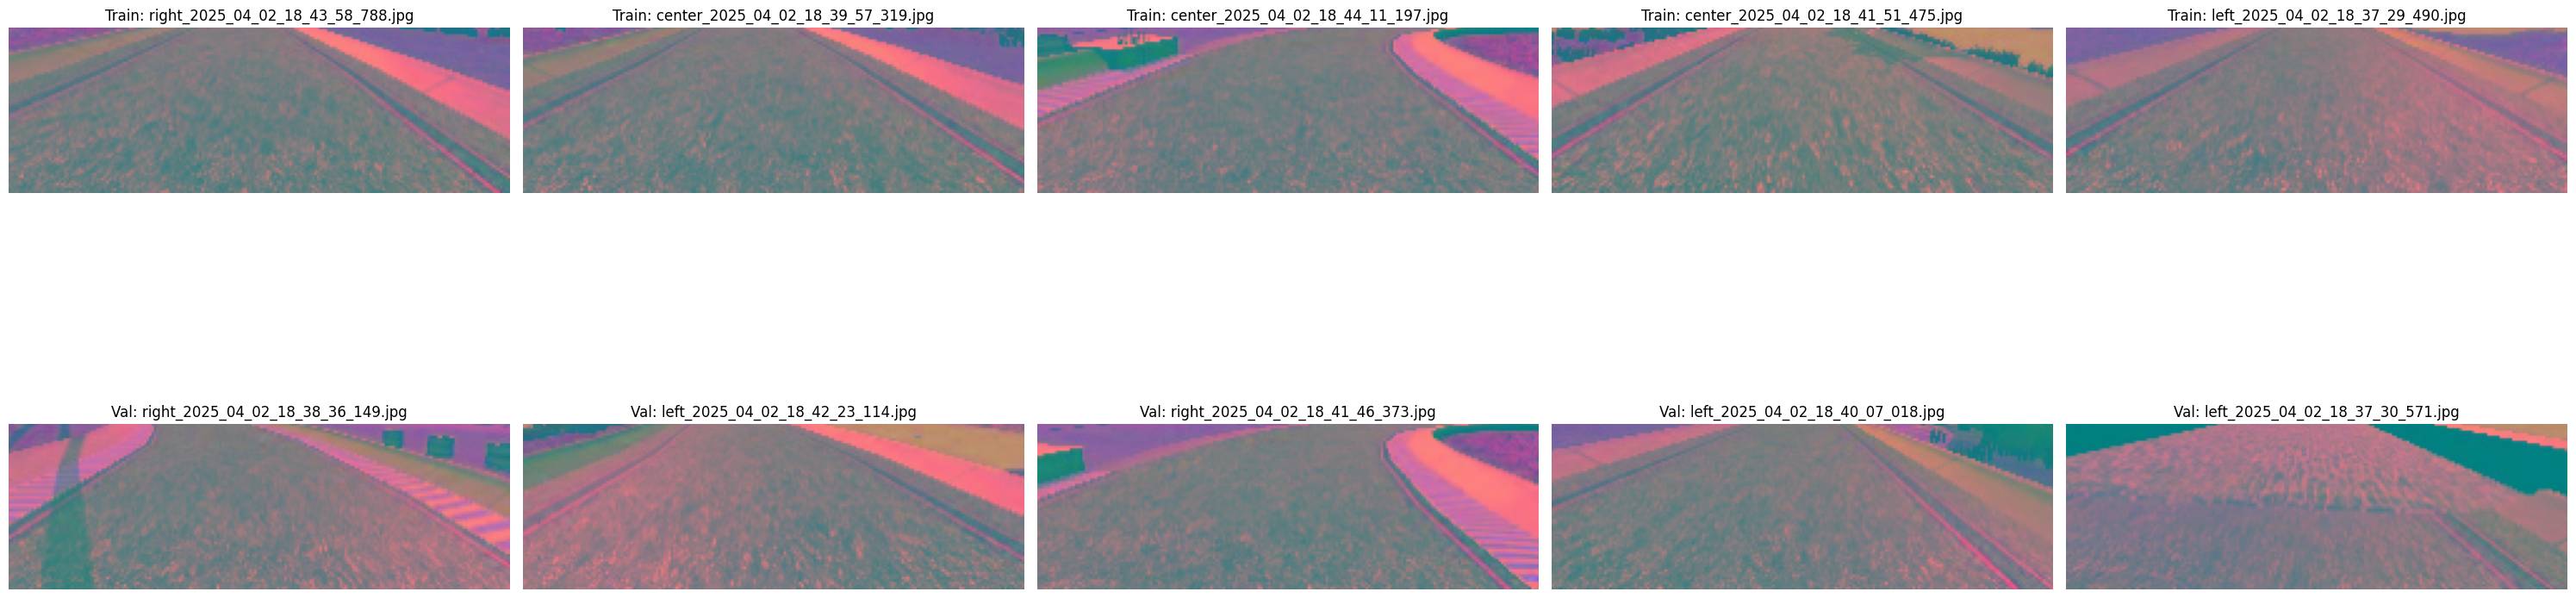

In [93]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import Sequence  # Import Sequence from keras

# Define your custom data generator
class BatchGenerator(Sequence):  # Inherit from keras.utils.Sequence
    def __init__(self, image_paths, steering_angles, batch_size=32, image_size=(66, 200, 3)):
        self.image_paths = list(image_paths)
        self.steering_angles = list(steering_angles)
        self.batch_size = batch_size
        self.image_size = image_size
        self.indexes = np.arange(len(image_paths))  # Keeps track of indexes

    def preprocess_image(self, path):
        """ Preprocess image: convert to YUV, crop, and resize """
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        image = image[70:-25, :, :]  # Crop the image (optional)
        image = cv2.resize(image, (self.image_size[1], self.image_size[0]))
        return image

    def __len__(self):
        """ Return number of batches per epoch """
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        """ Generate one batch of data """
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_steering_angles = [self.steering_angles[i] for i in batch_indexes]

        # Preprocess images
        images = [self.preprocess_image(path) for path in batch_image_paths]
        X_batch = np.array(images)
        y_batch = np.array(batch_steering_angles)

        return X_batch, y_batch

    def on_epoch_end(self):
        """ Shuffle the data at the end of each epoch """
        data = list(zip(self.image_paths, self.steering_angles))
        random.shuffle(data)
        self.image_paths, self.steering_angles = zip(*data)
        self.image_paths = list(self.image_paths)
        self.steering_angles = list(self.steering_angles)
        self.indexes = np.arange(len(self.image_paths))  # Reset indexes after shuffling

    def repeat(self):  # Loop over data indefinitely
        while True:
            for i in range(len(self)):
                yield self[i]

# Load image paths and dummy steering angles (replace with actual data)
image_folder = '/Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/IMG'
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png'))]
steering_angles = [0.0] * len(image_paths)  # Replace with actual values if available

# Split into train and validation sets
train_paths, val_paths, train_angles, val_angles = train_test_split(image_paths, steering_angles, test_size=0.2, random_state=42)

# Create BatchGenerators
train_gen = BatchGenerator(train_paths, train_angles, batch_size=32)
val_gen = BatchGenerator(val_paths, val_angles, batch_size=32)

# Shuffle and fetch first batches
train_gen.on_epoch_end()  # Shuffling before training
val_gen.on_epoch_end()  # Shuffling before validation
X_train_batch, y_train_batch = train_gen[0]
X_val_batch, y_val_batch = val_gen[0]

# Get file names for display
train_file_names = [os.path.basename(train_paths[i]) for i in range(5)]
val_file_names = [os.path.basename(val_paths[i]) for i in range(5)]

# Plot training and validation images
plt.figure(figsize=(30, 12))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_batch[i])
    plt.title(f"Train: {train_file_names[i]}", fontsize=12)
    plt.axis('off')

for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_val_batch[i])
    plt.title(f"Val: {val_file_names[i]}", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

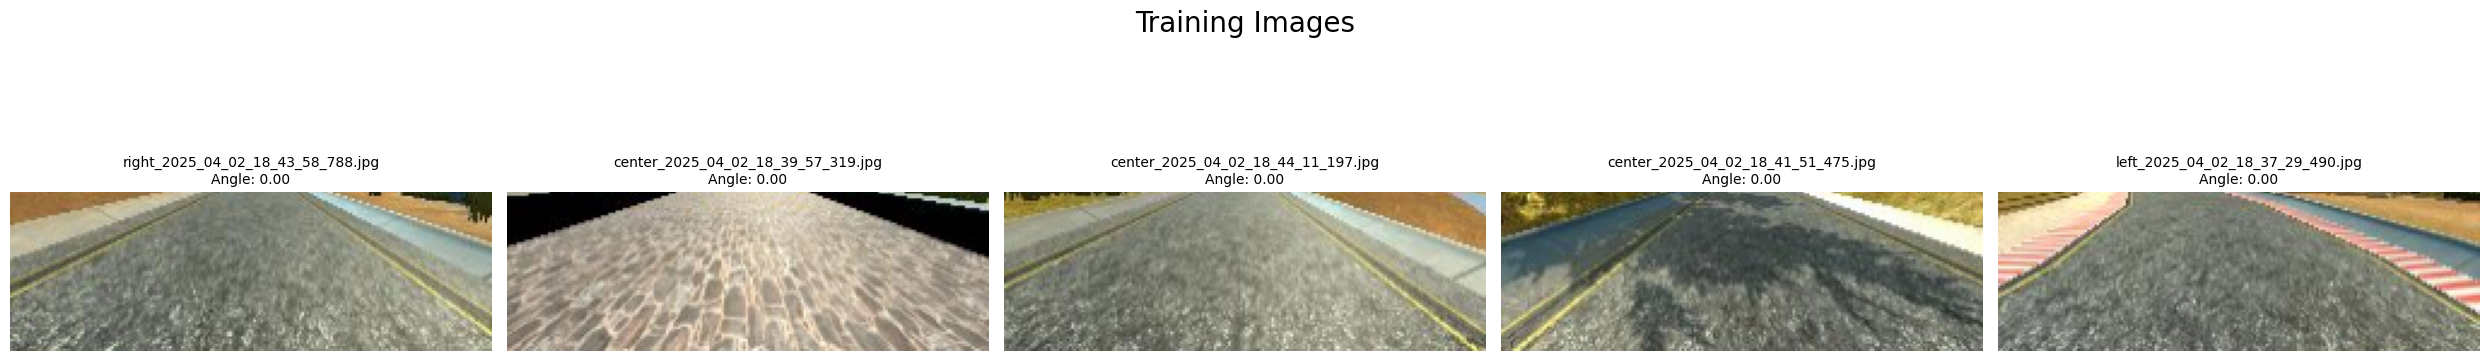

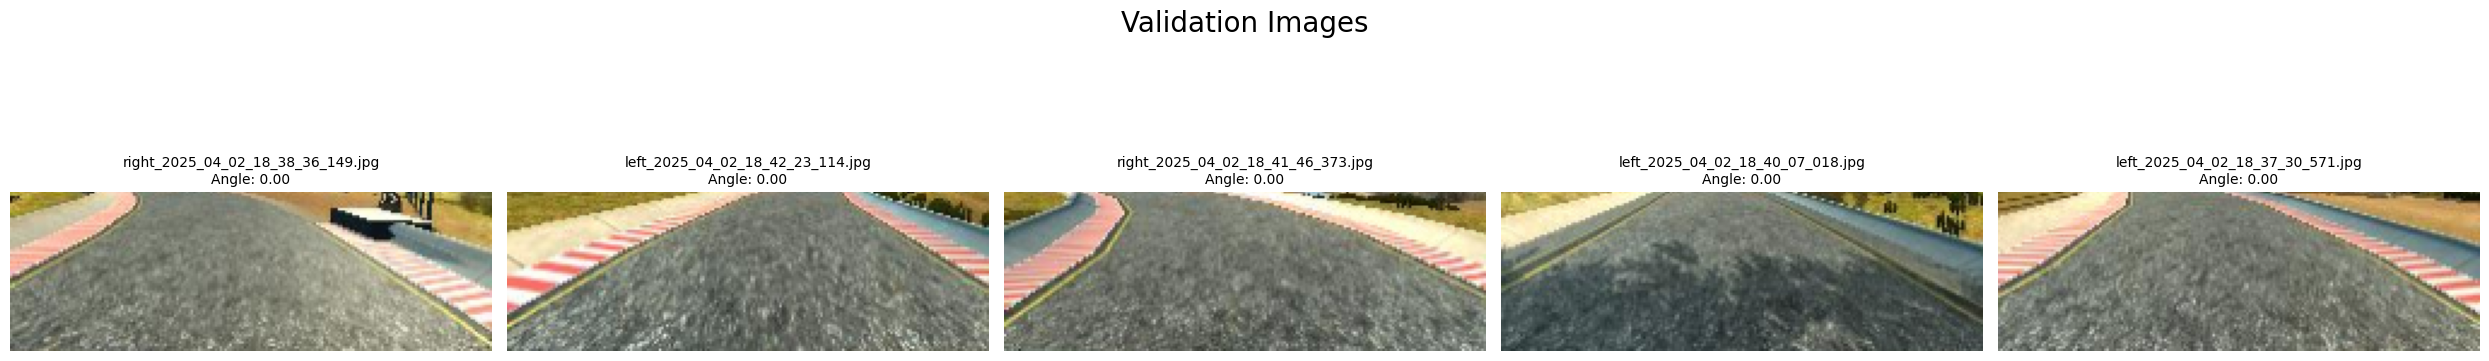

In [94]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Set your image folder and get all image paths
image_folder = '/Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/IMG'
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png'))]

# Simulated steering angles (replace with actual if available)
steering_angles = [0.0] * len(image_paths)

# Split into training and validation sets (80% train, 20% validation)
X_train_paths, X_val_paths, y_train, y_val = train_test_split(image_paths, steering_angles, test_size=0.2, random_state=42)

# Function to show images with labels
def show_images_with_labels(image_paths, steering_angles, title, num_images=5):
    plt.figure(figsize=(25, 5))
    plt.suptitle(title, fontsize=20)

    for i in range(num_images):
        image = cv2.imread(image_paths[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        image = image[70:-25, :, :]
        image = cv2.resize(image, (200, 66))
        image_rgb = cv2.cvtColor(image, cv2.COLOR_YUV2RGB)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(image_rgb)
        plt.axis('off')
        filename = os.path.basename(image_paths[i])
        angle = steering_angles[i]
        plt.title(f'{filename}\nAngle: {angle:.2f}', fontsize=10)

    plt.tight_layout()
    plt.show()

# Show training and validation images
show_images_with_labels(X_train_paths, y_train, "Training Images", num_images=5)
show_images_with_labels(X_val_paths, y_val, "Validation Images", num_images=5)

Loading image: /Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/IMG/center_2025_04_02_18_39_48_634.jpg
Loading image: /Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/IMG/right_2025_04_02_18_43_46_306.jpg
Loading image: /Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/IMG/center_2025_04_02_18_43_16_832.jpg
Loading image: /Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/IMG/right_2025_04_02_18_38_43_290.jpg
Loading image: /Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/IMG/center_2025_04_02_18_42_33_419.jpg


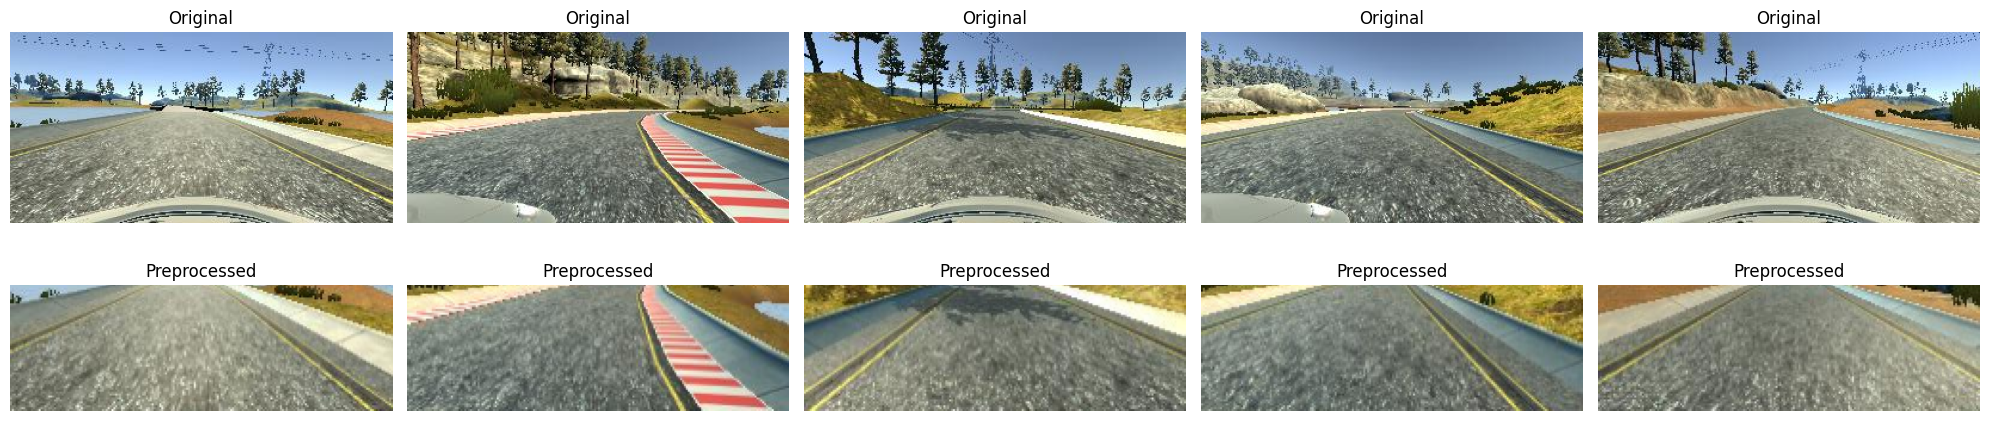

In [97]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to preprocess image (YUV, crop, resize, normalize)
def preprocess_image(path, target_size=(66, 200)):
    image = cv2.imread(path)
    if image is None:
        raise FileNotFoundError(f"Image at path {path} could not be loaded.")
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)            # Convert to YUV
    image = image[70:-25, :, :]                               # Crop (remove sky and car hood)
    image = cv2.resize(image, (target_size[1], target_size[0]))  # Resize to (66, 200)
    image = image / 255.0                                     # Normalize to [0, 1]
    return image

# Function to show original vs preprocessed images
def show_original_vs_preprocessed(image_paths, num_images=5):
    plt.figure(figsize=(20, 5))
    for i in range(num_images):
        print(f"Loading image: {image_paths[i]}")

        # Load original image
        orig = cv2.imread(image_paths[i])
        if orig is None:
            print(f"Error loading image {image_paths[i]}")
            continue

        orig_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

        # Preprocess image
        preprocessed = preprocess_image(image_paths[i])
        # Convert back to displayable RGB format from normalized YUV
        preprocessed_rgb = cv2.cvtColor((preprocessed * 255).astype('uint8'), cv2.COLOR_YUV2RGB)

        # Show original
        plt.subplot(2, num_images, i + 1)
        plt.imshow(orig_rgb)
        plt.axis('off')
        plt.title("Original")

        # Show preprocessed
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(preprocessed_rgb)
        plt.axis('off')
        plt.title("Preprocessed")

    plt.tight_layout()
    plt.show()

# Example usage
image_folder = '/Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/IMG'
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png'))]

# Display original vs preprocessed images
show_original_vs_preprocessed(image_paths, num_images=5)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Conv2D, Dropout, Flatten, Dense

def nvidia_model():
    model = Sequential()
    model.add(Input(shape=(66, 200, 3)))  # Explicit input layer
    model.add(Lambda(lambda x: x / 255.0))  # Normalization

    model.add(Conv2D(24, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))  # Output: steering angle

    return model

In [99]:
from tensorflow.keras.optimizers import Adam

model = nvidia_model()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')

In [100]:
# Define generators
train_generator = BatchGenerator(X_train_paths, y_train, batch_size=32)
val_generator = BatchGenerator(X_val_paths, y_val, batch_size=32)

# Calculate steps per epoch manually before calling repeat
steps_per_epoch = len(X_train_paths) // train_generator.batch_size
validation_steps = len(X_val_paths) // val_generator.batch_size

# Use the repeat() function to keep feeding data
train_generator = train_generator.repeat()
val_generator = val_generator.repeat()

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1,
    steps_per_epoch=steps_per_epoch,  # Steps per epoch
    validation_steps=validation_steps  # Validation steps
)

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 1.1602e-04 - val_loss: 4.0350e-10
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 2.2611e-08 - val_loss: 5.7244e-12
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 4.4901e-09 - val_loss: 2.1704e-11
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 2.2015e-09 - val_loss: 2.0275e-12
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 2.3807e-09 - val_loss: 7.1004e-12
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 6.3248e-10 - val_loss: 8.1654e-12
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 4.0036e-10 - val_loss: 1.3005e-13
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 1.9003e-10 - val_loss: 3.3608e-14
Epoch 9/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 2.9875e-10 - val_loss: 4.9838e-12
Epoch 10/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1.6403e-10 - val_loss: 2.2218e-12


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


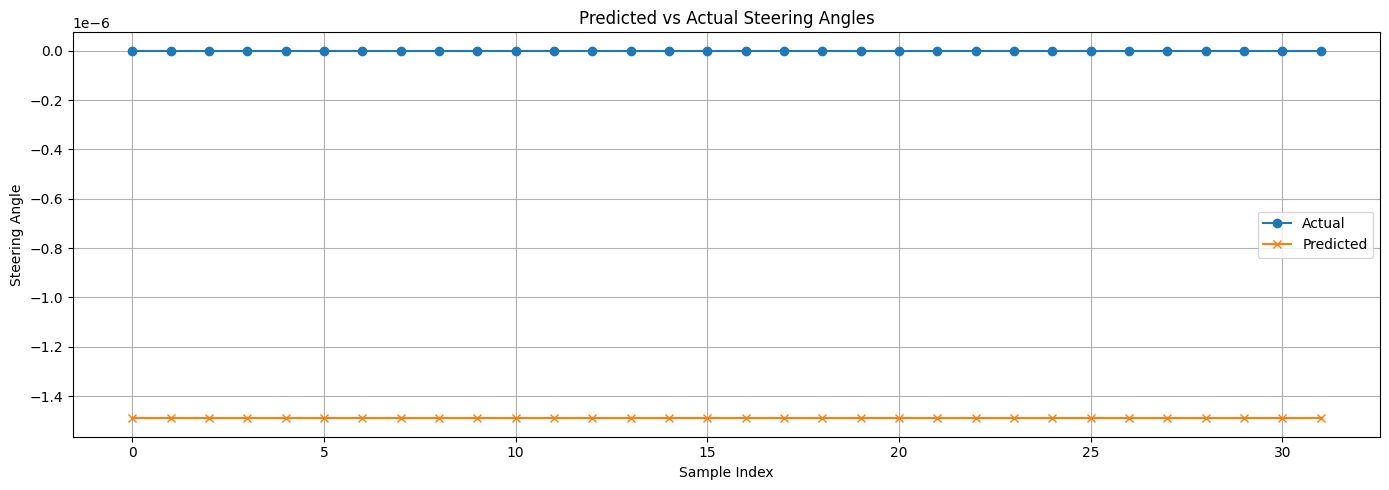

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of validation data manually from the generator
X_batch, y_true = next(val_generator)

# Predict on the batch
y_pred = model.predict(X_batch)
y_pred = y_pred.flatten()
y_true = y_true.flatten()

# Plot predictions vs actual values
plt.figure(figsize=(14, 5))
plt.plot(y_true[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Predicted vs Actual Steering Angles')
plt.xlabel('Sample Index')
plt.ylabel('Steering Angle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.6f}")

Mean Absolute Error (MAE): 0.000001


In [104]:
from sklearn.metrics import mean_absolute_error

all_preds = []
all_actuals = []

# Number of batches to test (e.g., 10)
for _ in range(10):
    X_batch, y_true_batch = next(val_generator)
    y_pred_batch = model.predict(X_batch).flatten()
    all_preds.extend(y_pred_batch)
    all_actuals.extend(y_true_batch.flatten())

# Compute error
mae = mean_absolute_error(all_actuals, all_preds)
print(f"MAE over 10 batches: {mae:.6f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAE over 10 batches: 0.000001


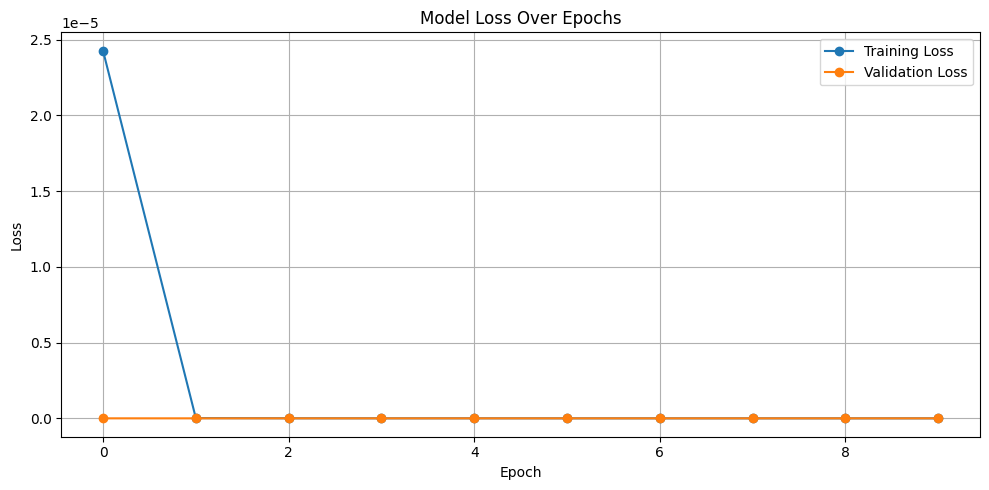

In [105]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [107]:
# Save in native Keras format (recommended)
model.save("model.keras")
print("Model saved as model.keras")

Model saved as model.keras


In [108]:
from IPython.display import FileLink

# Create download link for model.keras
FileLink('model.keras')

/Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/model.keras

In [109]:
import zipfile
import os
from IPython.display import FileLink

# Step 1: Save model in recommended Keras format
model.save("model.keras")

# Step 2: Zip the model file
zip_filename = "model_keras.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write("model.keras")

# Step 3: Provide download link
FileLink(zip_filename)

/Users/shubhamsuhaskamble/Desktop/Coding/Projects/ComputerVision/model_keras.zip

In [3]:
from tensorflow.keras.models import load_model
import keras

# Enable unsafe deserialization globally (needed for Lambda layers)
keras.config.enable_unsafe_deserialization()

# Load the model from your path
model = load_model('/Users/shubhamsuhaskamble/Downloads/model.keras')

# Optional: Check model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_8 (Lambda)               │ (None, 66, 200, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,440 (1.92 MB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,221 (985.24 KB)